In [1]:
!pip install plotnine

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     |████████████████████████████████| 4.7 MB 5.0 MB/s            
     |████████████████████████████████| 63 kB 3.4 MB/s             
     |████████████████████████████████| 111 kB 51.0 MB/s            


In [2]:
# Import relevant libraries
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import colors
from skimage.metrics import structural_similarity as compare_ssim
import cv2
import copy
import pandas as pd

from plotnine import *

In [3]:
# Function for producing differenced image at RGB color channels

def img_diff(orig_image, new_image):
    # Convert images to grayscale
    imageA = copy.deepcopy(orig_image)
    imageB = copy.deepcopy(new_image)
    grayA = cv2.cvtColor(imageA, cv2.COLOR_RGB2GRAY)
    grayB = cv2.cvtColor(imageB, cv2.COLOR_RGB2GRAY)

    # compute the Structural Similarity Index (SSIM) between the two
    # images, ensuring that the difference image is returned
    (score, diff) = compare_ssim(grayA, grayB, full=True)
    diff = (diff * 255).astype("uint8")

    # threshold the difference image, followed by finding contours to
    # obtain the regions of the two input images that differ
    thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    # Display image differences
    #f, axarr = plt.subplots(2,2)
    #axarr[0,0].imshow(imageA)
    #axarr[0,1].imshow(imageB)
    #axarr[1,0].imshow(diff)
    #axarr[1,1].imshow(thresh)

    # Return the differenced threshold image
    return thresh

# Create function to crop center of image 
def crop_image_center(img, rows, cols):
    
    # Find starting coordinates of top left corner of center crop
    start_row = (img.shape[0] - rows) // 2
    start_col = (img.shape[1] - cols) // 2
    
    new_image = copy.deepcopy(img[start_row:start_row+rows, start_col:start_col+cols, :])
    
    return new_image

# Create function to create difference of difference image based on crop dimensions

def diffdiff(base1, base2, new1, new2, crop_rows, crop_cols):
    base1a = crop_image_center(base1, crop_rows, crop_cols)
    base2a = crop_image_center(base2, crop_rows, crop_cols)
    new1a = crop_image_center(new1, crop_rows, crop_cols)
    new2a = crop_image_center(new2, crop_rows, crop_cols)
    diff1 = img_diff(base1a, new1a)
    diff2 = img_diff(base2a, new2a)
    diffdiff1 = copy.deepcopy(diff2 - diff1)
    return diffdiff1

In [4]:
# Load images
img_names4 = ['Sinabung_2018-08-08_261080_22365_aVH.png',
              'Sinabung_2018-08-15_261080_22365_aVH.png','Sinabung_2018-08-22_261080_22365_aVH.png','Sinabung_2018-08-29_261080_22365_aVH.png',
              'Sinabung_2020-08-08_261080_22365_aVH.png',
              'Sinabung_2020-08-15_261080_22365_aVH.png','Sinabung_2020-08-22_261080_22365_aVH.png','Sinabung_2020-08-29_261080_22365_aVH.png']

img_list4 = []
for image in img_names4:
    new_img_string = 'ML/' + image
    new_img = plt.imread(new_img_string)
    img_list4.append(new_img)
    
# Load images
img_names5 = ['Sinabung_2018-08-08_261080_22365_aVH.png',
              'Sinabung_2018-09-05_261080_22365_aVH.png','Sinabung_2018-09-12_261080_22365_aVH.png','Sinabung_2018-09-19_261080_22365_aVH.png',
              'Sinabung_2020-08-08_261080_22365_aVH.png',
              'Sinabung_2020-09-05_261080_22365_aVH.png','Sinabung_2020-09-12_261080_22365_aVH.png','Sinabung_2020-09-19_261080_22365_aVH.png']

img_list5 = []
for image in img_names5:
    new_img_string = 'ML/' + image
    new_img = plt.imread(new_img_string)
    img_list5.append(new_img)

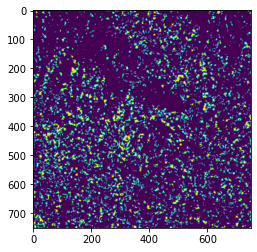

In [5]:
# Get difference of difference images
new_diff1 = diffdiff(img_list4[0], img_list4[1], img_list4[4], img_list4[5], 750, 750)

plt.imshow(new_diff1)

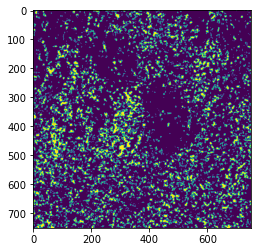

In [6]:
# Get difference of difference images
new_diff2 = diffdiff(img_list4[0], img_list4[2], img_list4[4], img_list4[6], 750, 750)

plt.imshow(new_diff2)

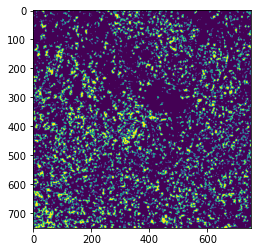

In [7]:
# Get difference of difference images
new_diff3 = diffdiff(img_list4[0], img_list4[3], img_list4[4], img_list4[7], 750, 750)

plt.imshow(new_diff3)

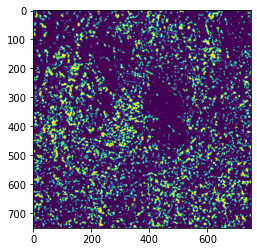

In [8]:
# Get difference of difference images
new_diff4 = diffdiff(img_list5[0], img_list5[1], img_list5[4], img_list5[5], 750, 750)

plt.imshow(new_diff4)

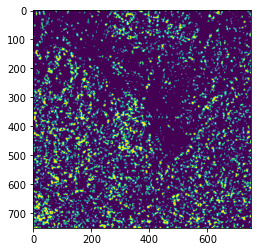

In [9]:
# Get difference of difference images
new_diff5 = diffdiff(img_list5[0], img_list5[2], img_list5[4], img_list5[6], 750, 750)

plt.imshow(new_diff5)

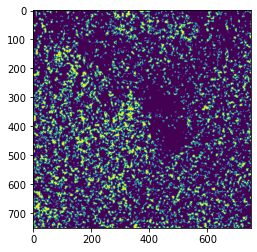

In [10]:
# Get difference of difference images
new_diff6 = diffdiff(img_list5[0], img_list5[3], img_list5[4], img_list5[6], 750, 750)

plt.imshow(new_diff6)

## Bucket difference of difference image

1. Divide image into 50x50 blocks 
2. Sum each 50x50 block and decide on a threshold like
  - >=10% of values are 255 or >=50% of values are 1
  
  
Key:
- 1 corresponds to a difference
- 0 means did little to no difference
- 255 indicates a high difference

In [11]:
input_image = new_diff6
saved_image = 'bucket_image.png'

In [12]:
# cv2.imwrite(saved_image, input_image)

In [13]:
image = cv2.imread(saved_image, cv2.COLOR_BGR2GRAY )

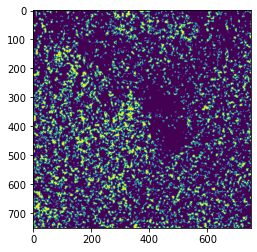

In [14]:
plt.imshow(new_diff6)

### Examine distribution of 0, 1, and 255 across image sections to decide bucket rules

In [21]:
def get_image_distribution(image, thresholds=[0,1,255], kernel=50):
    '''thresholds should be in order of difference level with the first value being the lowest'''
    kernel = kernel
    data = []
    #1. copy[0:50, 0:50]
    #2. copy[0:50, 50:100]
    #3. copy[0:50, 100:150]
    #....
    #16. copy[50:100, 0:50] etc.
    ind = 0
    for row in range(0, 750, kernel):
        for col in range(0, 750, kernel):
            index = f"[{row},{row+kernel}], [{col}, {col+kernel}]"
            subset = image[row:row+kernel, col:col+kernel]
            num_low = (subset==thresholds[0]).sum()
            num_med = (subset==thresholds[1]).sum()
            num_high = (subset==thresholds[2]).sum()
#             print(f"[{row}, {row+kernel}], [{col}, {col+kernel}]")
            data.append([index, ind, num_low, num_med, num_high])
            ind += 1
            
    df = pd.DataFrame(data)
    df.columns = ['subset', 'index', f'num_{thresholds[0]}', f'num_{thresholds[1]}', f'num_{thresholds[2]}', ]
    return df

In [16]:
df = get_image_distribution(image)

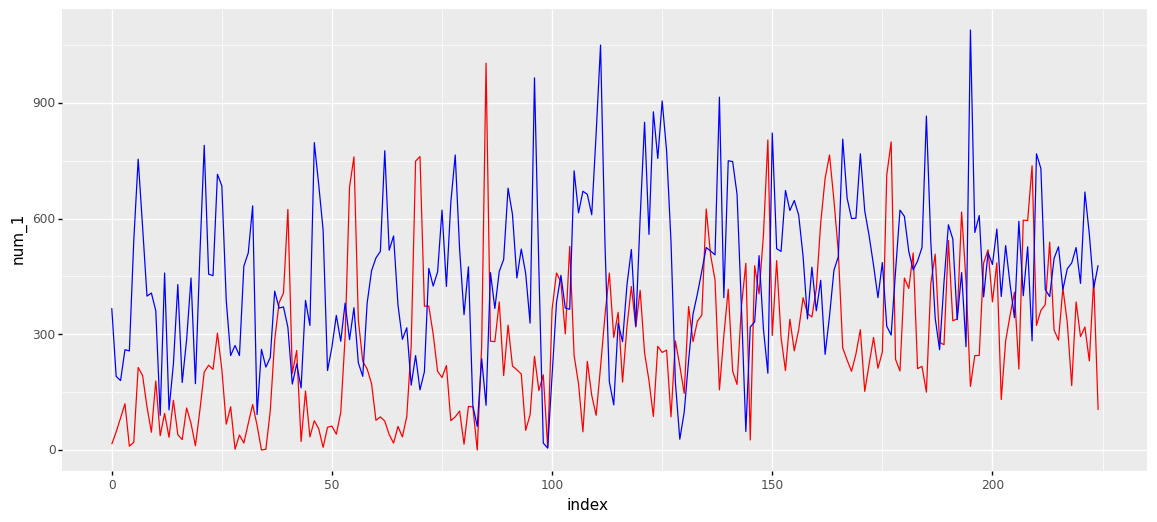

<ggplot: (8755481402614)>

In [17]:
(
    ggplot(data=df)
    + geom_line(aes(x='index', y='num_1'), color='red')
    + geom_line(aes(x='index', y='num_255'), color='blue')
    + theme(figure_size=(14,6))
)

75% quantile indicates that there would be about 457 counts of `255` and and 1 counts of `1`. From this we can set some base rules:

First iteration:
1. High if 75% quantile of 255 or 1
2. Medium if 40% quantile + of 255 or 1
3. Low otherwise
Comments: No medium values were counted with this

Second iteration:
1. High if >=25% of values in the block are 255
2. Medium if number of non-zero values is >=50%
3. Low otherwise

Use 0 to indicate low, 0.5 to indicate medium, 1 to indicate high.

In [22]:
# first iteration
high_255, high_1 = df.quantile(0.75)[['num_255', 'num_1']]
med_255, med_1 = df.quantile(0.4)[['num_255', 'num_1']]

In [36]:
def bucketize_image_diff(image, kernel=50):
    image_size = image.shape[0]
    iterations = image_size / kernel
    print(iterations)
    image_len = image.shape[1]
    copy = image.copy()
    for row in range(0, image_len, kernel):
        for col in range(0, image_len, kernel):
            subset = copy[row:row+kernel, col:col+kernel]
            num_1 = (subset==1).sum()
            num_255 = (subset==255).sum()
            num_0 = (subset==0).sum()

            if num_255 >= (kernel**2)*0.3:
                copy[row:row+kernel, col:col+50] = 255
            elif num_255>=(kernel**2)*0.10 and num_1>=(kernel**2)*0.3:
                copy[row:row+kernel, col:col+50] = 255
            elif (num_255+num_1) >= (kernel**2)*0.4:
                copy[row:row+kernel, col:col+50] = 100
            else:
                copy[row:row+kernel, col:col+50] = 0
                
    return copy

In [40]:
bucketized = bucketize_image_diff(image, kernel=50)

15.0


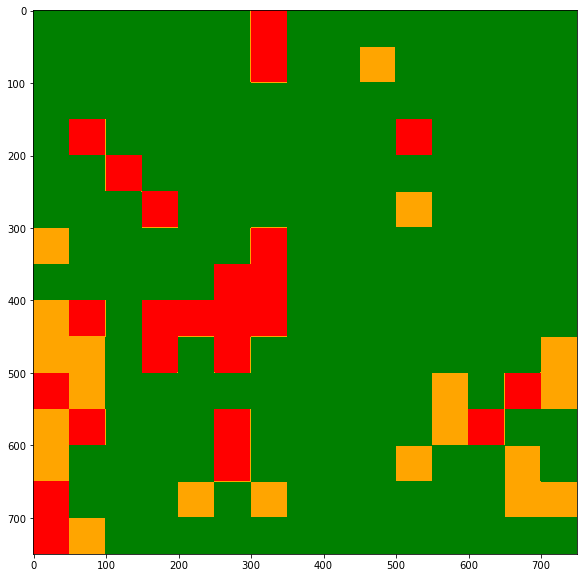

In [41]:
# make a color map of fixed colors
cmap = colors.ListedColormap(['green','orange', 'red'])
bounds=[0,100,255]

plt.figure(figsize=(20, 10))
plt.imshow(bucketized, cmap=cmap)

In [44]:
cv2.imwrite( 'test_bucketized_damage.png',bucketized)

True